<a href="https://colab.research.google.com/github/saurabh4742/ML_Learning/blob/main/HousePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analayze and prediction of housing data set to predict house rent price using ultiple linear regession algorithm

###TASK
#cleaning and data preprocessing
#Selection of particular algorithm
#Evaluate the model to achive maximum accuracy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataset=pd.read_csv('Housing.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
dataset['mainroad']=dataset['mainroad'].map({'yes':1,'no':0})
dataset['guestroom']=dataset['guestroom'].map({'yes':1,'no':0})
dataset['basement']=dataset['basement'].map({'yes':1,'no':0})
dataset['hotwaterheating']=dataset['hotwaterheating'].map({'yes':1,'no':0})
dataset['airconditioning']=dataset['airconditioning'].map({'yes':1,'no':0})
dataset['prefarea']=dataset['prefarea'].map({'yes':1,'no':0})
dataset=pd.get_dummies(dataset,columns=['furnishingstatus'],drop_first=42)
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


In [ ]:
X=dataset[['bedrooms','bathrooms','stories','parking','area']]
y=dataset[['price']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
model.score(X_train,y_train)

0.5781632182405307

In [ ]:
model.score(X_test,y_test)

0.5046674349674196

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
mse

2079998282278.2297

In [ ]:
r2

0.5046674349674196

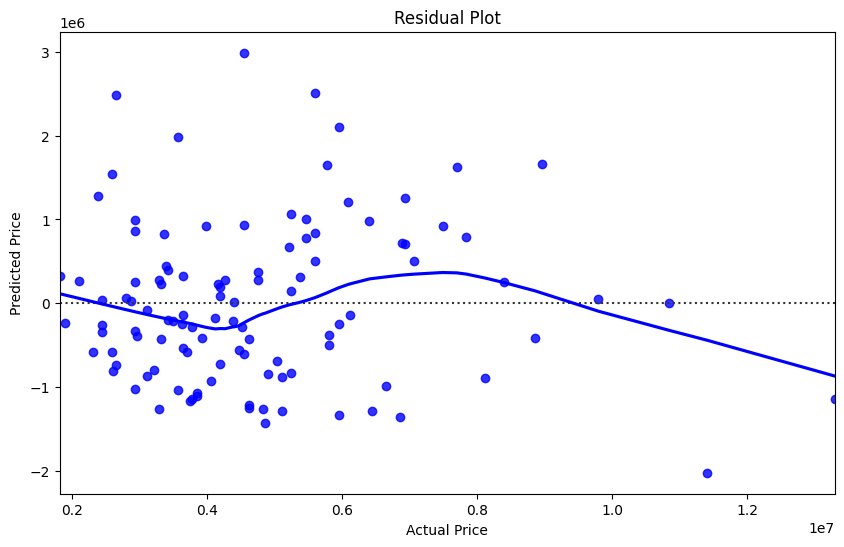

In [ ]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_test,y=y_pred,color='blue',lowess=True)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Residual Plot')
plt.show()

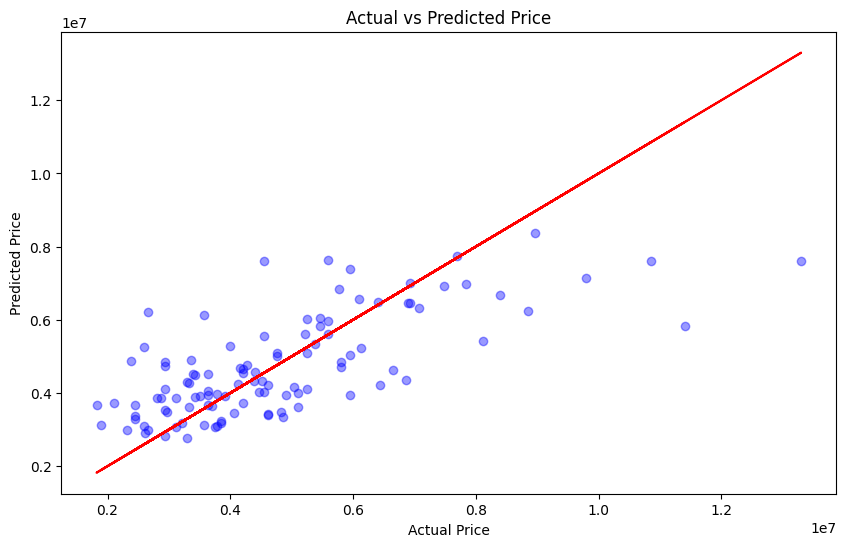

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue',alpha=0.4)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [ ]:
area=float(input('Enter the area of the house:'))
bedrooms=int(input('Enter the number of bedrooms:'))
bathrooms=int(input('Enter the number of bathrooms:'))
stories=int(input('Enter the number of stories:'))
parking=int(input('Enter the number of parking spaces:'))

user_data=pd.DataFrame([[bedrooms,bathrooms,stories,parking,area]],columns=['bedrooms','bathrooms','stories','parking','area'])
predicted_price=model.predict(user_data)
print('Predicted Price:',predicted_price[0])

Enter the area of the house:4000
Enter the number of bedrooms:2
Enter the number of bathrooms:4
Enter the number of stories:2
Enter the number of parking spaces:2
Predicted Price: [8157930.91408533]
